### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [61]:
data = pd.read_csv('data/coupons.csv')

In [62]:
data.head()
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

2. Investigate the dataset for missing or problematic data.

In [63]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [65]:
data.shape[0]

12684

I see that there are 12684 rows in the data set provided, and car column has most of the values as null so i decided to drop that column and this column has no valuable data.

In [66]:
data = data.drop(['car'], axis=1)

In [67]:
data = data.dropna()

In [68]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [69]:
data.shape[0]


12079

In [70]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


AFter dropping car column, I removed all null values and now total rows are 12079 after dropping all null values.

5. Use a bar plot to visualize the `coupon` column.

In [71]:
data.coupon.unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

Text(0.5, 1.0, 'acceptance')

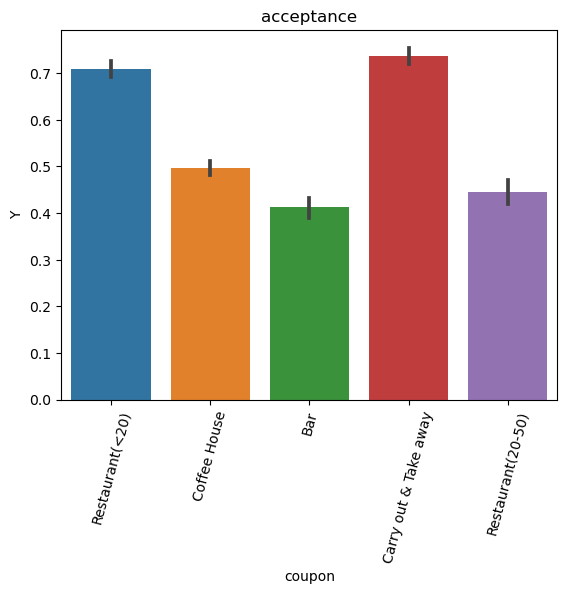

In [173]:
sns.barplot(data=data, x="coupon", y='Y')
plt.xticks(rotation=75)
plt.title("acceptance")


If you see the graph you will notice that, carry out and takeout has highest acceptance and second comes the cheap restaurants coupon.

Text(0.5, 1.0, 'acceptance')

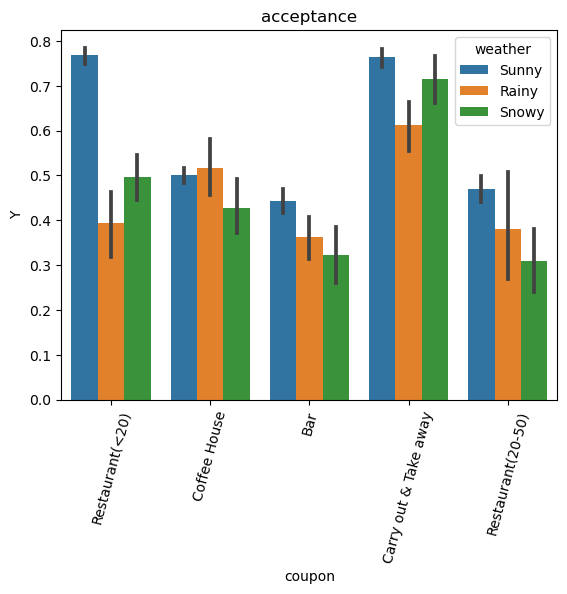

In [175]:
sns.barplot(data=data, x="coupon", y='Y', hue="weather")
plt.xticks(rotation=75)
plt.title("acceptance")

sunny days has better acceptance ratio compared to other days. Also on rainy days users liked to go to coffee house.

Text(0.5, 1.0, 'acceptance')

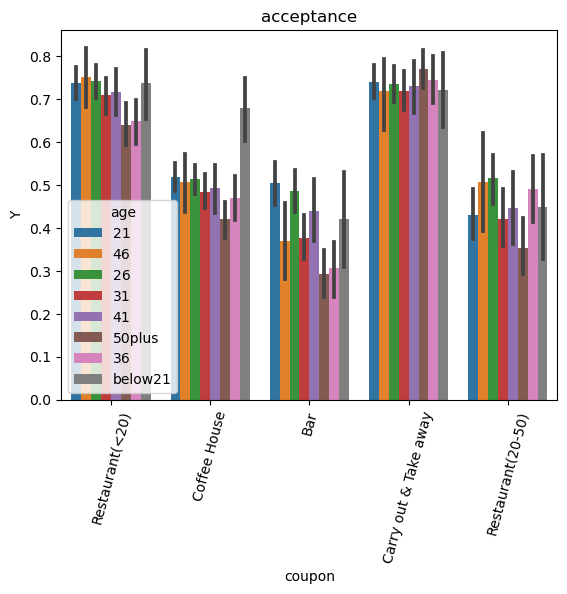

In [176]:
sns.barplot(data=data, x="coupon", y='Y', hue="age")
plt.xticks(rotation=75)
plt.title("acceptance")

6. Use a histogram to visualize the temperature column.

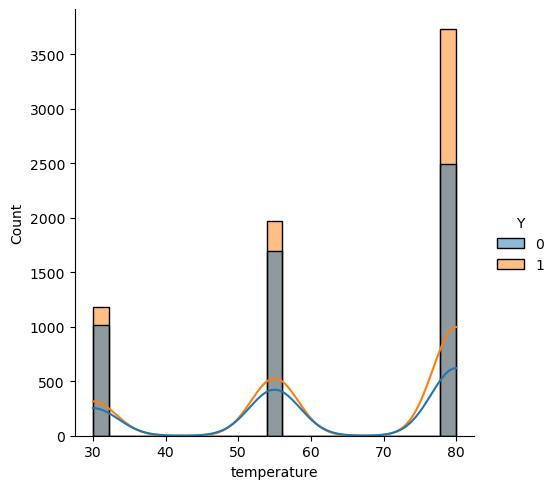

In [116]:
sns.displot(data=data, x="temperature", hue="Y", kde=True)

Looking at the temperature histogram its obvious that there are more entries for high temperature then for lower, also more acceptance ratio in high temp.

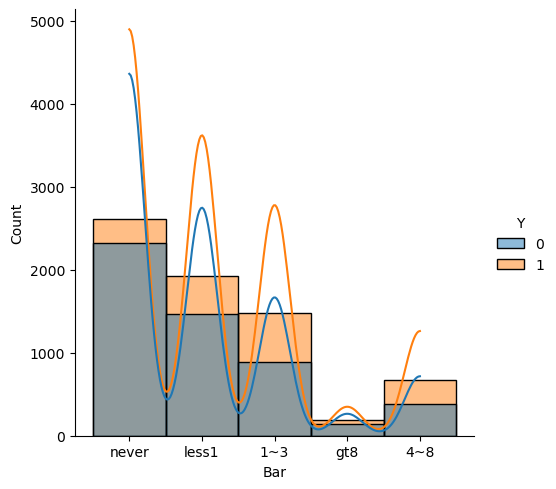

In [117]:
sns.displot(data=data, x="Bar", hue="Y", kde=True)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [75]:
value='Bar'
df2=data.query("coupon == @value")

2. What proportion of bar coupons were accepted?


In [76]:
count = df2.shape[0]
count

1913

Total number of Bar coupon send are 2017

In [77]:
value=0
dfBar0=df2.query("Y == @value")
count0 = dfBar0.shape[0]
count0

1125

In [78]:
value=1
dfBar1=df2.query("Y == @value")
count1 = dfBar1.shape[0]
count1

788

In [83]:
dfBar1.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

out of 1913, 1125 said no and 788 said yes

In [79]:
count1/count

0.41191845269210664

41% said yes to coupon

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [80]:
# ['never', 'less1', '1~3', 'gt8', '4~8']
value=['never', 'less1', '1~3']
dfBar1Less=dfBar1.query("Bar in @value")
countBar1Less =  dfBar1Less.shape[0]
countBar1Less

641

In [82]:
value=['less1', '1~3']
dfBar1Less=dfBar1.query("Bar in @value")
countBar1Less =  dfBar1Less.shape[0]
countBar1Less

492

In [84]:
# ['never', 'less1', '1~3', 'gt8', nan, '4~8']
value=['gt8', '4~8']
dfBar1More=dfBar1.query("Bar in @value")
countBar1More =  dfBar1More.shape[0]
countBar1More

147

analysis:
total said yes to coupon - 788
users less 3 or less 641
but if i exclue users who never went to bar - 492
users more then 3 times - 147

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [85]:
# ['never', 'less1', '1~3', 'gt8', '4~8']
value=['1~3', 'gt8', '4~8']
dfBar1More1=dfBar1.query("Bar in @value")
countBar1More1 =  dfBar1More1.shape[0]
countBar1More1

392

In [89]:
dfBar1.age.unique()

array(['21', '46', '26', '31', '50plus', '41', '36', 'below21'],
      dtype=object)

In [90]:
value=['46', '26', '31', '50plus', '41', '36']
dfBar1More1Age25 = dfBar1More1.query("age in @value")
countBar1More1Age25 = dfBar1More1Age25.shape[0]
countBar1More1Age25

278

drivers go to bar more then once a month are 392, and 278 are over the age of 25

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [96]:
dfBar1More1.passanger.unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [97]:
dfBar1More1.occupation.unique()

array(['Student', 'Healthcare Support', 'Management', 'Sales & Related',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Life Physical Social Science', 'Retired',
       'Computer & Mathematical', 'Healthcare Practitioners & Technical',
       'Unemployed', 'Personal Care & Service',
       'Arts Design Entertainment Sports & Media', 'Protective Service',
       'Business & Financial', 'Food Preparation & Serving Related',
       'Installation Maintenance & Repair', 'Education&Training&Library',
       'Community & Social Services', 'Transportation & Material Moving',
       'Building & Grounds Cleaning & Maintenance',
       'Architecture & Engineering', 'Production Occupations'],
      dtype=object)

In [99]:
passangers = ['Friend(s)', 'Partner']
occupation = ['Farming Fishing & Forestry']
dfBar1PassOcc = dfBar1More1.query("(passanger in @passangers) and (occupation not in @occupation)")
countBar1PassOcc = dfBar1PassOcc.shape[0]
countBar1PassOcc

135

Drivers go to bar more then once a month are 392, and 278 are over the age of 25, 

Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry are 135 out of 392

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [103]:
dfBar1More1.maritalStatus.unique()

array(['Single', 'Unmarried partner', 'Married partner', 'Divorced'],
      dtype=object)

In [104]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed - maritalStatus
passangers = ['Friend(s)', 'Partner']
dfBar1Pass = dfBar1More1.query("(passanger in @passangers)")
countBar1Pass = dfBar1Pass.shape[0]
countBar1Pass


135

In [115]:
# - go to bars more than once a month and are under the age of 30 *OR*
age = ['21', '26', 'below21']
dfBar1Age = dfBar1More1.query("age in @age")
countBar1Age = dfBar1Age.shape[0]
countBar1Age

236

In [110]:
dfBar1.income.unique()

array(['$62500 - $74999', '$75000 - $87499', '$12500 - $24999',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [109]:
dfBar1.RestaurantLessThan20.unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [112]:
# - go to cheap restaurants more than 4 times a month and income is less than 50K. 
restaurants = ['4~8', 'gt8']
income = ['$12500 - $24999', '$37500 - $49999', '$25000 - $37499','Less than $12500']

dfBar1Income = dfBar1.query("(RestaurantLessThan20 in @restaurants) and (income in @income)")
countBar1Income  = dfBar1Income .shape[0]
countBar1Income 


152

In [114]:
dfBar1More1.age.unique()

array(['21', '26', '31', '50plus', '41', '36', '46', 'below21'],
      dtype=object)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- total accepted the Bar coupon 788
- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR* - 135
- go to bars more than once a month and are under the age of 30 *OR* 236
- go to cheap restaurants more than 4 times a month and income is less than 50K. - 152

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [145]:
valueRes='Restaurant(<20)'
df2Res20=data.query("coupon == @valueRes" )
df2Res20.shape[0]

2653

In [146]:
valueY=1
df2Res20Accept=df2Res20.query(("Y == @valueY"))
df2Res20Accept.shape[0]

1881

In [151]:
df2Res20Accept.shape[0]/df2Res20.shape[0]

0.7090086694308331

In [177]:
df2Res20Accept.weather.unique()

array(['Sunny', 'Rainy', 'Snowy'], dtype=object)

In [148]:
income = ['$12500 - $24999', '$37500 - $49999', '$25000 - $37499','Less than $12500']

df2Res20Income = df2Res20Accept.query("income in @income")
df2Res20Income.shape[0]


998

In [150]:
age = ['21', '26', 'below21', '31', '36']
df2Res20Age= df2Res20Accept.query("age in @age")
df2Res20Age.shape[0] 

1356

In [178]:
weather = ['Sunny']
df2Res20Weather= df2Res20Accept.query("weather in @weather")
df2Res20Weather.shape[0] 

1641

You can see that cheap resturent coupons are more accepte in sunny weather, and also in younger aged users.